# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    
---

* [1.Pandas를 이용한 전처리](#Pandas를-이용한-전처리:시간,-위치-정보) <br>
* [2.시간날짜](#시간날짜) <br>
     *  [2.1 python의 시간날짜](#python의-시간날짜)
         * [calendar](#calendar)<br>
         *  [time](#time)<br>
         * [datetime](#datetime)<br>
         * [strptime](#strptime)<br>
         * [strftime](#strftime)<br>
     *  [2.2 Pandas의 시간날짜](#Pandas의-시간날짜)
         * [to_datetime:foramt](#to_datetime)<br>
         * [resample](#resample)<br>
         * [OHLC](#OHLC)<br>
*  [3. 지도](#지도)<br>
    *  [3.1 folum](#folum)<br>
        * [Map](#folium.Map)<br>
        * [Marker](#folium.Marker)<br>
        * [CircleMarker](#folium.CircleMarker)<br>
        * [Circle](#folium.Circle)<br>
            * [iterrows](#iterrows)<br>
            * [itertuples](#itertuples)<br>
               * [namedtuple](#namedtuple)<br>

*  [4.그래프:matplotlib ](#그래프)   
    *  [4.1 matplotlib.pyplot](#pyplot)<br>
    *  [4.2 State Machine](#State-Machine)<br>
        *  [figure](#plt.figure)<br>
        *  [axes](#plt.axes)<br>
        *  [subplots](#plt.subplots)<br>
        *  [title](#plt.pltitleot)<br>
        *  [label](#plt.xlabel)<br>
        *  [legend](#plt.legend)<br>
        *  [grid](#plt.grid)<br>   
        *  [ticks](#plt.xticks)<br>
        *  [lim](#plt.xlim)<br>

        *  [style](#plt.style)<br>
            *  [style.use](#plt.style.use)<br>
            *  [style.context](#plt.style.context)<br>

### Pandas를 이용한 전처리:시간, 위치 정보
데이터 출처 
[도로교통공단_교통사고 정보]: https://www.data.go.kr/data/15003493/fileData.do

In [4]:
import pandas as pd

In [5]:
car= pd.read_csv('car.csv',encoding='cp949') #encoding.
car

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2019,2019010100,야,화,1,0,0,0,0,부산,...,기타,중앙선 침범,교차로,교차로내,승용차,보행자,1150507.0,1685987.0,129.152465,35.157884
1,2019,2019010103,야,화,1,0,0,0,0,경기,...,정면충돌,중앙선 침범,단일로,기타단일로,승용차,승용차,943018.0,1921233.0,126.857149,37.288292
2,2019,2019010116,주,화,1,0,0,0,0,경북,...,측면충돌,안전운전 의무 불이행,교차로,교차로부근,승용차,사륜오토바이(ATV),1100414.0,1739893.0,128.609230,35.650108
3,2019,2019010119,야,화,1,0,0,0,0,대전,...,횡단중,안전운전 의무 불이행,교차로,교차로부근,승용차,보행자,989194.0,1817621.0,127.379560,36.355946
4,2019,2019010121,야,화,1,0,0,0,0,경북,...,기타,안전운전 의무 불이행,단일로,기타단일로,승용차,보행자,1127700.0,1767912.0,128.915041,35.899506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3228,2019,2019123105,야,화,1,0,0,0,0,서울,...,차도통행중,안전운전 의무 불이행,교차로,교차로부근,화물차,보행자,964440.0,1943029.0,127.097769,37.485819
3229,2019,2019123108,주,화,1,1,0,1,0,강원,...,추돌,안전운전 의무 불이행,교차로,교차로내,승용차,건설기계,1097892.0,2009288.0,128.616149,38.078411
3230,2019,2019123112,주,화,1,1,0,0,1,경북,...,공작물충돌,안전운전 의무 불이행,교차로,교차로내,승용차,없음,1082569.9,1777238.5,128.415998,35.988434
3231,2019,2019123112,주,화,1,1,0,1,0,울산,...,횡단중,기타,교차로,교차로부근,승용차,보행자,1157722.0,1731868.0,129.240504,35.570292


- 모든 데이터의 갯수가 3233으로 동일
    - 결측치 없음

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   발생년         3233 non-null   int64  
 1   발생년월일시      3233 non-null   int64  
 2   주야          3233 non-null   object 
 3   요일          3233 non-null   object 
 4   사망자수        3233 non-null   int64  
 5   부상자수        3233 non-null   int64  
 6   중상자수        3233 non-null   int64  
 7   경상자수        3233 non-null   int64  
 8   부상신고자수      3233 non-null   int64  
 9   발생지시도       3233 non-null   object 
 10  발생지시군구      3233 non-null   object 
 11  사고유형_대분류    3233 non-null   object 
 12  사고유형_중분류    3233 non-null   object 
 13  사고유형        3233 non-null   object 
 14  가해자법규위반     3233 non-null   object 
 15  도로형태_대분류    3233 non-null   object 
 16  도로형태        3233 non-null   object 
 17  가해자_당사자종별   3233 non-null   object 
 18  피해자_당사자종별   3233 non-null   object 
 19  발생위치X_UTMK  3233 non-null  

발생년, 발생년월시 중복 데이터 (불필요)
- `drop`으로 '발생년' 열 제거

In [7]:
car.drop('발생년',axis=1,inplace=True) 

데이터의 특이한 점
- 숫자 데이터에서 날짜 데이터로 변경
- 위도 경도 데이터 이용

이번에는 시간, 사고유형, 위도와 경도를 이용

In [8]:
data2=car[['발생년월일시','사고유형','위도','경도']]

In [9]:
data2

,발생년월일시,사고유형,위도,경도
0,2019010100,기타,35.157884,129.152465
1,2019010103,정면충돌,37.288292,126.857149
2,2019010116,측면충돌,35.650108,128.609230
3,2019010119,횡단중,36.355946,127.379560
4,2019010121,기타,35.899506,128.915041
...,...,...,...,...
3228,2019123105,차도통행중,37.485819,127.097769
3229,2019123108,추돌,38.078411,128.616149
3230,2019123112,공작물충돌,35.988434,128.415998
3231,2019123112,횡단중,35.570292,129.240504


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생년월일시  3233 non-null   int64  
 1   사고유형    3233 non-null   object 
 2   위도      3233 non-null   float64
 3   경도      3233 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.2+ KB


## 시간날짜
3가지 전략으로 발생년월일시 인식하도록 하려함
1. indexing
2. 나눗셈의 몫,나머지 이용
3. object로 변형

In [11]:
#전략1 : indexing
t=2009010100
str(2009010100)[:4]+'-'+str(t)[4:6]+'-'+str(t)[6:8]

'2009-01-01'

In [12]:
#전략2: 나누기의 몫,나머지 이용
str(int(t/1000000))+'-'+str(int(t%1000000))[:1]+'-'+str(int(t%1000))[:1]

'2009-1-1'

In [13]:
#전략3: astype('object')
data2['발생년월일시']=data2['발생년월일시'].astype('object')

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data2['발생년월일시'] #object!

0       2019010100
1       2019010103
2       2019010116
3       2019010119
4       2019010121
           ...    
3228    2019123105
3229    2019123108
3230    2019123112
3231    2019123112
3232    2019123116
Name: 발생년월일시, Length: 3233, dtype: object

In [18]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생년월일시  3233 non-null   object 
 1   사고유형    3233 non-null   object 
 2   위도      3233 non-null   float64
 3   경도      3233 non-null   float64
dtypes: float64(2), object(2)
memory usage: 101.2+ KB


발생년월일시
* 2019010100은  2009년 01월 01일 00시 의미
____ 년 __월 __일 __ 시
* `pd.to_datetime(data2['발생년월일시'],unit='s')`로 변경
    -  값이 2019년이 아닌 2033년으로 나옴.
    - 해당 데이터에는 부적절함

In [15]:
pd.to_datetime(data2['발생년월일시'],unit='s') #이전 timestamp에 사용방식

0      2033-12-24 04:08:20
1      2033-12-24 04:08:23
2      2033-12-24 04:08:36
3      2033-12-24 04:08:39
4      2033-12-24 04:08:41
               ...        
3228   2033-12-25 11:31:45
3229   2033-12-25 11:31:48
3230   2033-12-25 11:31:52
3231   2033-12-25 11:31:52
3232   2033-12-25 11:31:56
Name: 발생년월일시, Length: 3233, dtype: datetime64[ns]

- int 로 되어있는 시간을 to_datetime으로 변경하니 잘못된 날짜가 나옴.
- 우선 python에서 시간날짜에 관한 모듈부터 알아봐야함

--- 

## python 의 시간날짜

In [21]:
import pandas as pd

In [1]:
import time, calendar, datetime

### calendar
- 연,월별로 캘린더 생성

In [21]:
print(calendar.calendar(2020))

                                  2020

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                      1  2                         1
 6  7  8  9 10 11 12       3  4  5  6  7  8  9       2  3  4  5  6  7  8
13 14 15 16 17 18 19      10 11 12 13 14 15 16       9 10 11 12 13 14 15
20 21 22 23 24 25 26      17 18 19 20 21 22 23      16 17 18 19 20 21 22
27 28 29 30 31            24 25 26 27 28 29         23 24 25 26 27 28 29
                                                    30 31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                   1  2  3       1  2  3  4  5  6  7
 6  7  8  9 10 11 12       4  5  6  7  8  9 10       8  9 10 11 12 13 14
13 14 15 16 17 18 19      11 12 13 14 15 16 17      15 16 17 18 19 20 21
20 21 22 23 24 25 26      18 19 20 21 22 

### time

time 모듈의 time 함수를 호출
- 1970년 1월 1일 0시 0분 0초 이후 경과한 시간을 초단위로 반환

In [19]:
time.time() #현재 시간 : 계속 숫자 증가함.

1596029035.3124323

In [20]:
time.time() #바뀜

1596029036.1551478

In [8]:
time(7,41,0) #7시 41분

datetime.time(7, 41)

### datetime 

- date :날짜 관리
- time : 시관관리
- datetime : 날짜와 시간
- timezone : 각 나라별 표준 시간( 예. 미국 서부,동부,남부,,,)

- 나라마다 표현 방식 다름

*공통된 표준이 있지만 지역마다 다름
2020-07-29
7-28-2020
28-7-2020

내부 관리와 보여주는건 다름 


In [23]:
import pandas as pd #str
from datetime import datetime,date, time

In [24]:
pd.datetime(2020,7,28)

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


datetime.datetime(2020, 7, 28, 0, 0)

In [25]:
dir(datetime) #datetime 내부네 datetime 존재

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

- `datetime(year, month, day`[, hour[, minute[, second[, microsecond[,tzinfo]]]]]`)`

 필수로 년,월,일 3개 필요

In [26]:
datetime.datetime(2020,7,28,12,45)  #AttributeError

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [27]:
type(datetime) # type => class => 인스턴스화

type

In [28]:
today=datetime(2020,7,28) #인스턴스화
today

datetime.datetime(2020, 7, 28, 0, 0)

In [29]:
type(today)

datetime.datetime

In [30]:
dir(today)

['__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 'astimezone',
 'combine',
 'ctime',
 'date',
 'day',
 'dst',
 'fold',
 'fromisoformat',
 'fromordinal',
 'fromtimestamp',
 'hour',
 'isocalendar',
 'isoformat',
 'isoweekday',
 'max',
 'microsecond',
 'min',
 'minute',
 'month',
 'now',
 'replace',
 'resolution',
 'second',
 'strftime',
 'strptime',
 'time',
 'timestamp',
 'timetuple',
 'timetz',
 'today',
 'toordinal',
 'tzinfo',
 'tzname',
 'utcfromtimestamp',
 'utcnow',
 'utcoffset',
 'utctimetuple',
 'weekday',
 'year']

In [31]:
today.year

2020

In [37]:
today.date()

datetime.date(2020, 7, 28)

In [32]:
today.time() #시간 관련 데이터 입력 안함

datetime.time(0, 0)

### datetime.strptime
- `datetime.strptime()` 클래스 메소드는 datetime 객체를 생성
- 문자열을 포맷에 맞추어 파싱하여 datetime으로 변환

In [38]:
datetime.strptime('2020-07-28','%Y-%m-%d')

datetime.datetime(2020, 7, 28, 0, 0)

In [51]:
datetime.strptime('2020/July/28','%Y/%B/%d')

datetime.datetime(2020, 7, 28, 0, 0)

### strftime
- date, datetime, time객체는 `strftime()`메소드를 지원함
- 시간을 object(문자열)을 포맷에 맞추어 string으로 변환

In [19]:
today.strftime('%y year %m mth')

'20 year 07 mth'

In [14]:
today.strftime('%Y 년 %m 월')

'2020 년 07 월'

####  format codes
* `%d` : 일
* `%m` : 월
* `%B` : 월(영어)
* `%y` : 년도 뒤의 2자리
* `%Y` : 년도 4개 자리
    - 참고 공식문서 : https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

## Pandas의 시간날짜
###  to_datetime
- 날짜/시간을 나타내는 **문자열/timestamp를 datetime 형으로 변환**
- `pd.to_datetime(시간)`

날짜 시간 표현 방식
- int : "timestamp"
    - 저번 실습의 timestamp는 nano seconds 로 점점 올라가는 방식
    - 메모리 최적화
- **문자열**: "formatted date / time"
    - 인간 친화적
    
이러한 이유 때문에 위의 int로 되어있는 날짜 시간이 잘못 변환된것을 알수 있음

### foramt
- 파이썬 기반 format은 포맷되어있는 것을 strftime 이용하여 파싱함.
    - `pd.to_datetime("시간", format='코드')`
    
방법   
1. object(문자열) 로 변경
2. `to_datetime`의 format으로 파싱하여 datetime형으로 변경하여 재할당

In [19]:
data2=car[['발생년월일시','사고유형','위도','경도']]
data2['발생년월일시']=data2['발생년월일시'].astype('object')
data2['발생년월일시']=pd.to_datetime(data2['발생년월일시'],format='%Y%m%d%H')
data2

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,발생년월일시,사고유형,위도,경도
0,2019-01-01 00:00:00,기타,35.157884,129.152465
1,2019-01-01 03:00:00,정면충돌,37.288292,126.857149
2,2019-01-01 16:00:00,측면충돌,35.650108,128.609230
3,2019-01-01 19:00:00,횡단중,36.355946,127.379560
4,2019-01-01 21:00:00,기타,35.899506,128.915041
...,...,...,...,...
3228,2019-12-31 05:00:00,차도통행중,37.485819,127.097769
3229,2019-12-31 08:00:00,추돌,38.078411,128.616149
3230,2019-12-31 12:00:00,공작물충돌,35.988434,128.415998
3231,2019-12-31 12:00:00,횡단중,35.570292,129.240504


In [27]:
data2.info() #성공적으로 datetime 형으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발생년월일시  3233 non-null   datetime64[ns]
 1   사고유형    3233 non-null   int8          
 2   위도      3233 non-null   float64       
 3   경도      3233 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int8(1)
memory usage: 79.1 KB


발생년월시를 인덱스로 변경

In [20]:
data2.set_index('발생년월일시')

,사고유형,위도,경도
발생년월일시,,,
2019-01-01 00:00:00,기타,35.157884,129.152465
2019-01-01 03:00:00,정면충돌,37.288292,126.857149
2019-01-01 16:00:00,측면충돌,35.650108,128.609230
2019-01-01 19:00:00,횡단중,36.355946,127.379560
2019-01-01 21:00:00,기타,35.899506,128.915041
...,...,...,...
2019-12-31 05:00:00,차도통행중,37.485819,127.097769
2019-12-31 08:00:00,추돌,38.078411,128.616149
2019-12-31 12:00:00,공작물충돌,35.988434,128.415998


시간날짜별로 그룹화하여 위도와 경도의 평균값을 구함

In [21]:
data2.groupby('발생년월일시').mean() #평균 겂울 로 대체

,위도,경도
발생년월일시,,
2019-01-01 00:00:00,35.157884,129.152465
2019-01-01 03:00:00,37.288292,126.857149
2019-01-01 16:00:00,35.650108,128.609230
2019-01-01 19:00:00,36.355946,127.379560
2019-01-01 21:00:00,35.899506,128.915041
...,...,...
2019-12-31 01:00:00,37.500788,126.983592
2019-12-31 05:00:00,37.485819,127.097769
2019-12-31 08:00:00,38.078411,128.616149


--- 
### datetime, timestamp 
pandas는 numpy 기반
datetime64는 python의 데이터 타입을 가져옴.
그걸 상속을 해서 timestamp라는 새로운 객체 생성.


In [87]:
type(pd.Timestamp) #class

type

In [88]:
pd.Timestamp.__bases__  #모든 부보 객체, 클래스를 알려줌 -상속

(pandas._libs.tslibs.c_timestamp._Timestamp,)

In [89]:
issubclass(pd.Timestamp, datetime) #datetime 에게 상속받음

True

In [90]:
data2.info() #datetime 에 상속받았을때..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발생년월일시  3233 non-null   datetime64[ns]
 1   사고유형    3233 non-null   int8          
 2   위도      3233 non-null   float64       
 3   경도      3233 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int8(1)
memory usage: 79.1 KB


type 마다 지원하는 기능이 다르기 떄문에 category 타입의 encoding기능을 쓰기위해 변환

In [29]:
data2['사고유형']=data2['사고유형'].astype('category') #s내부적 숫자
data2['사고유형']=data2['사고유형'].cat.codes #s내부적 숫자
data2

/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/MG/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,발생년월일시,사고유형,위도,경도
0,2019-01-01 00:00:00,1,35.157884,129.152465
1,2019-01-01 03:00:00,8,37.288292,126.857149
2,2019-01-01 16:00:00,13,35.650108,128.609230
3,2019-01-01 19:00:00,14,36.355946,127.379560
4,2019-01-01 21:00:00,1,35.899506,128.915041
...,...,...,...,...
3228,2019-12-31 05:00:00,10,37.485819,127.097769
3229,2019-12-31 08:00:00,12,38.078411,128.616149
3230,2019-12-31 12:00:00,0,35.988434,128.415998
3231,2019-12-31 12:00:00,14,35.570292,129.240504


### resample
-  datetime 시간 간격에 따라서 그룹핑하여 재조정함
    - freq='1h' : 시간별로
    - freq='d' : 일자별로
    - freq='1M': 월별로
    - freq='1Y': 연간
- groupby 와 유사하게 집계함수를 뒤에 붙임.
    
### OHLC
open-high-low-close(시가-고가-저가-종가)
- 첫 데이터, 최고값,최저값, 마지막 데이터를 날짜별로 어떻게 변하는지 보여줌

6시간 단위로 첫 데이터, 최고값,최저값, 마지막 데이터가 어떻게 변하는지 보여줌
- 작은 단위이기 때문에 해당 시간 구간에 값이 없으면 NaN

In [30]:
data2.set_index('발생년월일시').resample('6h').ohlc()

사고유형                           위도                        \
                     open  high   low close       open       high        low   
발생년월일시                                                                         
2019-01-01 00:00:00   1.0   8.0   1.0   8.0  35.157884  37.288292  35.157884   
2019-01-01 06:00:00   NaN   NaN   NaN   NaN        NaN        NaN        NaN   
2019-01-01 12:00:00  13.0  13.0  13.0  13.0  35.650108  35.650108  35.650108   
2019-01-01 18:00:00  14.0  14.0   1.0   1.0  36.355946  36.355946  35.899506   
2019-01-02 00:00:00  12.0  12.0  12.0  12.0  37.029538  37.029538  37.029538   
...                   ...   ...   ...   ...        ...        ...        ...   
2019-12-30 12:00:00   1.0   1.0   0.0   0.0  35.870309  36.746275  35.870309   
2019-12-30 18:00:00  13.0  14.0   1.0   4.0  35.267119  37.899751  35.201217   
2019-12-31 00:00:00  10.0  13.0  10.0  10.0  37.333920  37.500788  37.333920   
2019-12-31 06:00:00  12.0  12.0  12.0  12.0  38.078411  38.078411  38.078411   
2019-12-31 12:00:00   0.0  14.0   0.0   1.0  35.988434  35.988434  35.233112   

                                        경도                                      
                         close        open        high         low       close  
발생년월일시                                                                          
2019-01-01 00:00:00  37.288292  129.152465  129.152465  126.857149  126.857149  
2019-01-01 06:00:00        NaN         NaN         NaN         NaN         NaN  
2019-01-01 12:00:00  35.650108  128.609230  128.609230  128.609230  128.609230  
2019-01-01 18:00:00  35.899506  127.379560  128.915041  127.379560  128.915041  
2019-01-02 00:00:00  37.029538  127.826843  127.826843  127.826843  127.826843  
...                        ...         ...         ...         ...         ...  
2019-12-30 12:00:00  36.746275  128.571921  128.571921  126.705607  126.705607  
2019-12-30 18:00:00  37.899751  126.495060  129.086877  126.495060  127.675431  
2019-12-31 00:00:00  37.485819  127.856920  127.856920  126.983592  127.097769  
2019-12-31 06:00:00  38.078411  128.616149  128.616149  128.616149  128.616149  
2019-12-31 12:00:00  35.233112  128.415998  129.240504  128.415998  128.581874  

[1459 rows x 12 columns]

하루동안에 첫 데이터, 최고값,최저값, 마지막 데이터를 날짜별로 어떻게 변하는지 보여줌

In [24]:
data2.set_index('발생년월일시').resample('d').ohlc()

사고유형                        위도                                   \
           open high low close       open       high        low      close   
발생년월일시                                                                       
2019-01-01    1   14   1     1  35.157884  37.288292  35.157884  35.899506   
2019-01-02   12   14   1     1  37.029538  37.568449  34.889828  34.889828   
2019-01-03    0   14   0     8  34.740804  37.661892  34.740804  36.507643   
2019-01-04    1   14   1    14  37.334707  37.334707  35.851911  37.296593   
2019-01-05    1   14   0    12  37.010639  37.600263  34.908291  34.908291   
...         ...  ...  ..   ...        ...        ...        ...        ...   
2019-12-27    1   14   1    12  35.368297  37.890083  33.438910  37.824000   
2019-12-28   14   14   0     1  33.412533  37.842168  33.412533  37.842168   
2019-12-29    1   14   0    14  35.860439  37.590333  35.556001  37.590333   
2019-12-30   10   14   0     4  37.493253  37.899751  35.201217  37.899751   
2019-12-31   10   14   0     1  37.333920  38.078411  35.233112  35.233112   

                    경도                                      
                  open        high         low       close  
발생년월일시                                                      
2019-01-01  129.152465  129.152465  126.857149  128.915041  
2019-01-02  127.826843  128.807758  126.625548  128.616390  
2019-01-03  126.387782  129.213627  126.387782  127.125570  
2019-01-04  126.794272  128.503308  126.794272  127.637178  
2019-01-05  127.220763  128.977905  127.120601  127.547289  
...                ...         ...         ...         ...  
2019-12-27  129.055128  129.055128  126.651213  126.741086  
2019-12-28  126.275380  129.151805  126.275380  127.301262  
2019-12-29  128.592295  129.325341  126.537650  127.062885  
2019-12-30  126.926969  129.086877  126.450308  127.675431  
2019-12-31  127.856920  129.240504  126.983592  128.581874  

[365 rows x 12 columns]

첫 데이터, 최고값,최저값, 마지막 데이터가 분기별로(3개월마다) 어떻게 변하는지 보여줌

In [25]:
data2.set_index('발생년월일시').resample('3M').ohlc()

사고유형                        위도                                   \
           open high low close       open       high        low      close   
발생년월일시                                                                       
2019-01-31    1   14   0    10  35.157884  38.204879  33.228292  36.126015   
2019-04-30   13   14   0    14  36.095690  38.252608  33.238928  36.303535   
2019-07-31   10   15   0    13  35.235930  38.437576  33.249907  35.798676   
2019-10-31   12   14   0    12  36.965228  38.251646  33.222138  35.055115   
2020-01-31   13   14   0     1  35.944464  38.214751  33.296176  35.233112   

                    경도                                      
                  open        high         low       close  
발생년월일시                                                      
2019-01-31  129.152465  129.402819  125.929658  128.110416  
2019-04-30  128.435449  129.507254  125.701076  127.344700  
2019-07-31  128.563064  129.550265  126.250518  128.788633  
2019-10-31  126.413996  129.443158  124.723794  128.361077  
2020-01-31  128.561187  129.379254  126.194011  128.581874

첫 데이터, 최고값,최저값, 마지막 데이터를 연간 어떻게 변하는지 보여줌
- 2019년 데이터이므로 1년치는 1개의 데이터만 존재

In [48]:
data2.set_index('발생년월일시').resample('1Y').ohlc()

사고유형                        위도                                   \
           open high low close       open       high        low      close   
발생년월일시                                                                       
2019-12-31    1   15   0     1  35.157884  38.437576  33.222138  35.233112   

                    경도                                      
                  open        high         low       close  
발생년월일시                                                      
2019-12-31  129.152465  129.550265  124.723794  128.581874

### 지도 
- 위도,경도 활용하여 지도에 표시

In [26]:
data2

,발생년월일시,사고유형,위도,경도
0,2019-01-01 00:00:00,1,35.157884,129.152465
1,2019-01-01 03:00:00,8,37.288292,126.857149
2,2019-01-01 16:00:00,13,35.650108,128.609230
3,2019-01-01 19:00:00,14,36.355946,127.379560
4,2019-01-01 21:00:00,1,35.899506,128.915041
...,...,...,...,...
3228,2019-12-31 05:00:00,10,37.485819,127.097769
3229,2019-12-31 08:00:00,12,38.078411,128.616149
3230,2019-12-31 12:00:00,0,35.988434,128.415998
3231,2019-12-31 12:00:00,14,35.570292,129.240504


In [55]:
!pip install -U folium

     |████████████████████████████████| 93 kB 637 kB/s eta 0:00:01


### folium
데이터를 Map에 그릴수 있도록 하는 모듈

In [37]:
import folium

In [54]:
dir(folium)

['Choropleth',
 'Circle',
 'CircleMarker',
 'ClickForMarker',
 'ColorLine',
 'ColorMap',
 'CssLink',
 'CustomIcon',
 'Div',
 'DivIcon',
 'Element',
 'FeatureGroup',
 'Figure',
 'FitBounds',
 'GeoJson',
 'GeoJsonPopup',
 'GeoJsonTooltip',
 'Html',
 'IFrame',
 'Icon',
 'JavascriptLink',
 'LatLngPopup',
 'LayerControl',
 'LinearColormap',
 'Link',
 'MacroElement',
 'Map',
 'Marker',
 'PolyLine',
 'Polygon',
 'Popup',
 'Rectangle',
 'RegularPolygonMarker',
 'StepColormap',
 'TileLayer',
 'Tooltip',
 'TopoJson',
 'Vega',
 'VegaLite',
 'WmsTileLayer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'branca',
 'features',
 'folium',
 'map',
 'raster_layers',
 'sys',
 'utilities',
 'vector_layers']

### folium.Map
위도 경도를 중심으로 지도를  보여줌
* 그래프가 안나오는 경우 : 보안 설정이 높은경우
- `folium.Map(location=[위도,경도])`
    - zoom_strat=10: 첫 화면에서 확대 되는 정도를 숫자로 표시.
    - zoom_control=True : 확대/축소 조절하는 컨트롤바를 표시
    - tiles: 지도/그림 유형

In [38]:
m1= folium.Map(location=[37.555,126.99])#서울의 위도경도
m1

zoom_start=10 기본값에서 값을 줄이면 축소

In [56]:
m2=folium.Map([37.555,126.991],zoom_start=6)
m2

zoom_start=10 기본값에서 값을 키우면 확대

In [57]:
m1= folium.Map(location=[37.555,126.99],zoom_start=15)

In [58]:
m1

지도상에 확대/축소 조절을 하는 zoom controls을 화면에서 표시/제거 여부

In [59]:
m1= folium.Map(location=[37.555,126.99],zoom_start=15,zoom_control=False)

In [60]:
m1

- `tiles = 'OpenStreetMap'`
    - 기본 지도 맵
    - options: `Stamen Toner','Stamen Watercolor' 는 지원함
    - 한국 지원 안하는 옵션들도 있음

In [39]:
folium.Map(location=[37.555,126.99],zoom_start=15,
               zoom_control=False,tiles='Stamen Toner')

In [40]:
folium.Map(location=[37.555,126.99],zoom_start=15,
               zoom_control=False,tiles='Stamen Watercolor')

### folium.Marker
지도를 보여주는것보다 값을 보여주는것이 더의미있음.
- `folium.map`의해 생성된 map 위에 경도,위도를 바탕으로 마커 표시함
- popup=None :popup되도록 옵션을 줄수 있음
    - 'click': 마커를 클릭하면 값이 나옴.

In [41]:
folium.Marker([37.555,126.99]).add_to(m1);
m1

In [42]:
folium.Marker([37.555,126.99], popup='click').add_to(m1)

In [43]:
m1

### folium.CircleMarker
- 위도 경도를 바탕으로 지도 확대/축소해도 그 크기를 유지하는 원을 그려줌.
- `folium.CircleMarker([위도,경도], popup=None ,radius=10)`
    - radius: 고정된 사이즈의 원의 반지름 크기 설정
    - corlor : 해당 색상으로 경계선 색상 지정
    - fill :해당색상으로 채우기

In [44]:
folium.CircleMarker([37.555,126.99], 
                    popup='click',radius=100,color='red',fill=True).add_to(m1)
m1

### folium.Circle
- 크기 확대/축소를 하면 circle은 따라서 축소됨
- `folium.Circle([위도,경도], popup=None ,radius=10)`



In [48]:
folium.Circle([37.555,126.991],
                    popup='click',radius=100).add_to(m1)
m1

여러개의 마커를 지도에 자동으로 표현하고 싶다면 행별로 값을 추출하여 적용해야함
- 이럴 때 생각나는것 `iterator`

In [73]:
dir(data2) #__array__ -> numpy 구조; __iter__ -> iterator  쓸수있음_

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

iter 삼총사
- 열: itmes
    - 키, series
- 행: iterrows
- 행: itertupes

### items
- 기본적으로 dataframe의 (컬럼명, 해당 컬럼의 값)을 series형태로 반복하여 추출
- `iterator.items()`

In [75]:
for i in data2: #키값 (열명) 
    print(i)

발생년월일시
사고유형
위도
경도


unpacking technique 이용

In [59]:
for i,j in data2.iloc[:30].items():  #키 :열 값
    print(i,j)

발생년월일시 0    2019-01-01 00:00:00
1    2019-01-01 03:00:00
2    2019-01-01 16:00:00
3    2019-01-01 19:00:00
4    2019-01-01 21:00:00
5    2019-01-02 03:00:00
6    2019-01-02 06:00:00
7    2019-01-02 10:00:00
8    2019-01-02 10:00:00
9    2019-01-02 15:00:00
10   2019-01-02 16:00:00
11   2019-01-02 18:00:00
12   2019-01-02 18:00:00
13   2019-01-02 19:00:00
14   2019-01-02 23:00:00
15   2019-01-03 03:00:00
16   2019-01-03 07:00:00
17   2019-01-03 12:00:00
18   2019-01-03 17:00:00
19   2019-01-03 20:00:00
20   2019-01-04 05:00:00
21   2019-01-04 07:00:00
22   2019-01-04 08:00:00
23   2019-01-04 10:00:00
24   2019-01-04 15:00:00
25   2019-01-05 01:00:00
26   2019-01-05 01:00:00
27   2019-01-05 02:00:00
28   2019-01-05 04:00:00
29   2019-01-05 08:00:00
Name: 발생년월일시, dtype: datetime64[ns]
사고유형 0      1
1      8
2     13
3     14
4      1
5     12
6      1
7     14
8     13
9      6
10    14
11    12
12    12
13     1
14     1
15     0
16     3
17     1
18    14
19     8
20     1
21    14
22  

### iterrows
- DataFrame의 행별로 반복적으로 (index, 값)을 series형태로 추출
    - 데이터를 하나씩 `위도,경도, popup 메시지`를 넣어야하므로 행추출하는 iter 이용

In [63]:
for i in data2.iloc[:30].iterrows():
    print(i)

(0, 발생년월일시    2019-01-01 00:00:00
사고유형                        1
위도                    35.1579
경도                    129.152
Name: 0, dtype: object)
(1, 발생년월일시    2019-01-01 03:00:00
사고유형                        8
위도                    37.2883
경도                    126.857
Name: 1, dtype: object)
(2, 발생년월일시    2019-01-01 16:00:00
사고유형                       13
위도                    35.6501
경도                    128.609
Name: 2, dtype: object)
(3, 발생년월일시    2019-01-01 19:00:00
사고유형                       14
위도                    36.3559
경도                     127.38
Name: 3, dtype: object)
(4, 발생년월일시    2019-01-01 21:00:00
사고유형                        1
위도                    35.8995
경도                    128.915
Name: 4, dtype: object)
(5, 발생년월일시    2019-01-02 03:00:00
사고유형                       12
위도                    37.0295
경도                    127.827
Name: 5, dtype: object)
(6, 발생년월일시    2019-01-02 06:00:00
사고유형                        1
위도                    37.5254
경도                

In [78]:
for i,j in data2.iterrows(): #unpacking
    print(i,j['위도'])

0 35.15788411
1 37.28829231
2 35.65010817
3 36.35594639
4 35.89950573
5 37.02953764
6 37.52536494
7 37.56844929
8 37.41679362
9 36.15067652
10 35.80841378
11 35.69684616
12 35.31663552
13 36.99570056
14 34.8898279
15 34.74080413
16 35.64903729
17 37.66189171
18 37.56240025
19 36.50764269
20 37.33470658
21 35.85191091
22 36.02568842
23 37.03963375
24 37.29659281
25 37.0106389
26 35.83379911
27 37.60026323
28 35.06907567
29 35.94620162
30 34.90829133
31 35.79354629
32 37.44852515
33 35.63034132
34 37.5810167
35 36.4449532
36 34.97105161
37 35.80634913
38 37.40288538
39 37.41201406
40 34.88788951
41 35.87412514
42 36.59873562
43 36.3098236
44 37.64497706
45 37.2315996
46 35.18948797
47 37.5540963
48 37.49109694
49 35.14292906
50 36.94467969
51 37.68724216
52 35.42654748
53 36.99102781
54 37.50603969
55 35.39865608
56 36.59083734
57 37.01264499
58 36.60558189
59 37.13220475
60 37.24710726
61 35.90763144
62 36.87712412
63 36.59689091
64 36.63649988
65 34.67995747
66 35.03919313
67 37.595722

584 35.40863907
585 35.06635751
586 34.98877697
587 36.34589672
588 37.56263749
589 35.72303556
590 37.71412566
591 37.03164134
592 35.63923348
593 37.48513987
594 37.57713067
595 37.49069895
596 35.48823494
597 36.10307566
598 37.44194547
599 34.60940251
600 35.25950992
601 34.94392954
602 34.69238396
603 37.55709228
604 34.88774945
605 34.72626554
606 37.592579799999996
607 34.81456609
608 33.51217073
609 37.69923737
610 34.8072331
611 37.76099327
612 35.97663821
613 35.28353902
614 36.623405600000005
615 35.17939247
616 37.21159033
617 35.98632196
618 37.23255586
619 37.34702395
620 36.55440272
621 35.70997793
622 34.81333611
623 33.51567667
624 35.21071139
625 37.41102199
626 37.17131208
627 35.97476065
628 37.66135399
629 34.70776204
630 36.80782785
631 37.39261467
632 34.81668409
633 35.24767670000001
634 36.08793045
635 34.97619976
636 35.54816687
637 36.17388667
638 37.734536999999996
639 36.71418559
640 33.29610486
641 36.75759103
642 37.47343905
643 35.15878212
644 36.0951143

1368 37.22724468
1369 34.45150634
1370 37.80607462
1371 37.1821914
1372 35.94604749
1373 37.83206122
1374 37.61140951
1375 34.59805277
1376 34.76692439
1377 37.51620538
1378 35.05495365
1379 37.12549962
1380 35.2256316
1381 35.15193176
1382 35.23199498
1383 36.93123044
1384 36.62311895
1385 37.52973099
1386 37.58653649
1387 36.451084
1388 36.07648441
1389 37.17662405
1390 35.80470737
1391 33.47347818
1392 35.53034148
1393 37.69877072
1394 36.62038291
1395 36.76123548
1396 35.72524729
1397 37.44251525
1398 37.90870468
1399 36.96842113
1400 35.2615316
1401 37.55984247
1402 37.46093966
1403 35.44525238
1404 35.79206266
1405 35.19155749
1406 36.06135447
1407 35.49059404
1408 37.58156049
1409 37.69653555
1410 35.16145055
1411 34.74970676
1412 35.87042477
1413 36.81127122
1414 35.30881991
1415 36.32494728
1416 37.59186764
1417 36.99507411
1418 35.76322278
1419 35.85631764
1420 34.93143053
1421 36.7098619
1422 36.51948207
1423 36.40121232
1424 37.67642811
1425 35.18913441
1426 35.14458774
142

1895 37.03139037
1896 36.39801446
1897 37.18339667
1898 35.63428627
1899 37.66011118
1900 35.55619045
1901 36.68764283
1902 37.4954349
1903 35.39358883
1904 36.62849
1905 35.11624466
1906 36.58174418
1907 36.00096822
1908 37.28138047
1909 34.87434826
1910 36.70890523
1911 37.17661093
1912 37.52841096
1913 35.73064011
1914 35.73299446
1915 37.37157591
1916 37.68046544
1917 37.51138193
1918 35.55343679
1919 34.95284124
1920 35.20210847
1921 37.35000147
1922 36.06543835
1923 37.9415021
1924 36.0191829
1925 36.32959863
1926 37.88725721
1927 37.53029855
1928 35.962309999999995
1929 35.8925825
1930 34.94565303
1931 36.98847462
1932 35.3167638
1933 34.7289066
1934 35.29240701
1935 36.802144899999995
1936 35.79490158
1937 37.02625154
1938 37.56255720000001
1939 35.30887372
1940 37.52681029
1941 38.03391806
1942 35.11668763
1943 37.43797807
1944 35.29651765
1945 36.88899922
1946 33.22213798
1947 37.39290996
1948 35.29973969
1949 35.42494223
1950 36.7888039
1951 37.68271875
1952 36.14069953
1953

2799 37.65289328
2800 37.63947436
2801 35.91807068
2802 37.23124548
2803 36.58284892
2804 36.78364463
2805 33.34493215
2806 35.25942569
2807 35.08313661
2808 37.64699588
2809 35.869818
2810 37.28646102
2811 37.52660079
2812 37.38467604
2813 37.51159822
2814 35.85649282
2815 35.17815214
2816 36.96719960000001
2817 35.75930704
2818 37.63518644
2819 36.18173347
2820 37.29812481
2821 37.39078911
2822 37.28080661
2823 37.67382681
2824 35.86947255
2825 36.1125479
2826 36.97305638
2827 36.82484993
2828 36.28007911
2829 34.88602493
2830 37.001169299999994
2831 36.66593439
2832 35.19905954
2833 35.70068515
2834 35.99632641
2835 35.25157748
2836 36.62191397
2837 35.14398063
2838 35.97497159
2839 34.7679889
2840 35.07145219
2841 35.19444168
2842 35.44419098
2843 37.24772251
2844 36.36003178
2845 35.82880572
2846 34.90973789
2847 35.22403911
2848 35.68866505
2849 35.09171976
2850 35.23218766
2851 35.52002016
2852 37.50222064
2853 37.47501973
2854 36.70932796
2855 37.5293713
2856 37.72948704
2857 3

In [57]:
for i,j in data2.iloc[:30].iterrows(): 
    folium.Marker(j[['위도','경도']], popup=j['사고유형']).add_to(m2)
m2

### itertuples
- `itertuples()`
-  데이터 프레임의 각 해별로 값을 차례대로 뽑으면서 **named tuple 형태**로 추출
    - 데이터를 하나씩 `위도,경도, popup 메시지`를 넣어야하므로 행 추출하는 iter 이용

In [68]:
for i in data2.itertuples(): #각 행을 tuple형식으로 뽑음(전통적)
    print(i)

Pandas(Index=0, 발생년월일시=Timestamp('2019-01-01 00:00:00'), 사고유형=1, 위도=35.15788411, 경도=129.1524645)
Pandas(Index=1, 발생년월일시=Timestamp('2019-01-01 03:00:00'), 사고유형=8, 위도=37.28829231, 경도=126.85714899999999)
Pandas(Index=2, 발생년월일시=Timestamp('2019-01-01 16:00:00'), 사고유형=13, 위도=35.65010817, 경도=128.60922970000001)
Pandas(Index=3, 발생년월일시=Timestamp('2019-01-01 19:00:00'), 사고유형=14, 위도=36.35594639, 경도=127.3795598)
Pandas(Index=4, 발생년월일시=Timestamp('2019-01-01 21:00:00'), 사고유형=1, 위도=35.89950573, 경도=128.9150412)
Pandas(Index=5, 발생년월일시=Timestamp('2019-01-02 03:00:00'), 사고유형=12, 위도=37.02953764, 경도=127.82684309999999)
Pandas(Index=6, 발생년월일시=Timestamp('2019-01-02 06:00:00'), 사고유형=1, 위도=37.52536494, 경도=126.7064001)
Pandas(Index=7, 발생년월일시=Timestamp('2019-01-02 10:00:00'), 사고유형=14, 위도=37.56844929, 경도=126.9952985)
Pandas(Index=8, 발생년월일시=Timestamp('2019-01-02 10:00:00'), 사고유형=13, 위도=37.41679362, 경도=127.2568148)
Pandas(Index=9, 발생년월일시=Timestamp('2019-01-02 15:00:00'), 사고유형=6, 위도=36.15067652, 경도=126.6255482000000

Pandas(Index=1566, 발생년월일시=Timestamp('2019-06-28 20:00:00'), 사고유형=14, 위도=36.881116399999996, 경도=127.11925420000001)
Pandas(Index=1567, 발생년월일시=Timestamp('2019-06-28 22:00:00'), 사고유형=0, 위도=35.69356205, 경도=129.19395740000002)
Pandas(Index=1568, 발생년월일시=Timestamp('2019-06-29 02:00:00'), 사고유형=14, 위도=37.73718755, 경도=127.09567549999998)
Pandas(Index=1569, 발생년월일시=Timestamp('2019-06-29 04:00:00'), 사고유형=0, 위도=37.54891896, 경도=127.21763500000002)
Pandas(Index=1570, 발생년월일시=Timestamp('2019-06-29 12:00:00'), 사고유형=1, 위도=37.94280474, 경도=127.3106652)
Pandas(Index=1571, 발생년월일시=Timestamp('2019-06-29 16:00:00'), 사고유형=7, 위도=35.05589232, 경도=127.27724440000001)
Pandas(Index=1572, 발생년월일시=Timestamp('2019-06-29 18:00:00'), 사고유형=8, 위도=34.88876672, 경도=128.5760823)
Pandas(Index=1573, 발생년월일시=Timestamp('2019-06-29 21:00:00'), 사고유형=14, 위도=36.77486738, 경도=127.01455659999999)
Pandas(Index=1574, 발생년월일시=Timestamp('2019-06-30 03:00:00'), 사고유형=14, 위도=37.58943584, 경도=127.09692920000002)
Pandas(Index=1575, 발생년월일시=Timestamp('201

Pandas(Index=2594, 발생년월일시=Timestamp('2019-10-27 09:00:00'), 사고유형=1, 위도=34.98798957, 경도=126.91020459999999)
Pandas(Index=2595, 발생년월일시=Timestamp('2019-10-27 09:00:00'), 사고유형=13, 위도=36.15367395, 경도=128.59434679999998)
Pandas(Index=2596, 발생년월일시=Timestamp('2019-10-27 10:00:00'), 사고유형=12, 위도=37.53222857, 경도=127.1934314)
Pandas(Index=2597, 발생년월일시=Timestamp('2019-10-27 10:00:00'), 사고유형=12, 위도=35.85372178, 경도=127.11373400000001)
Pandas(Index=2598, 발생년월일시=Timestamp('2019-10-27 16:00:00'), 사고유형=4, 위도=35.35165073, 경도=129.2554642)
Pandas(Index=2599, 발생년월일시=Timestamp('2019-10-27 21:00:00'), 사고유형=12, 위도=35.23057646, 경도=128.65996090000002)
Pandas(Index=2600, 발생년월일시=Timestamp('2019-10-28 02:00:00'), 사고유형=1, 위도=35.53794213, 경도=129.3771013)
Pandas(Index=2601, 발생년월일시=Timestamp('2019-10-28 03:00:00'), 사고유형=0, 위도=37.31755961, 경도=127.96825829999999)
Pandas(Index=2602, 발생년월일시=Timestamp('2019-10-28 05:00:00'), 사고유형=10, 위도=37.55247591, 경도=126.81595300000001)
Pandas(Index=2603, 발생년월일시=Timestamp('2019-10-28 05:00

In [69]:
t=data2.itertuples()
next(t)

Pandas(Index=0, 발생년월일시=Timestamp('2019-01-01 00:00:00'), 사고유형=1, 위도=35.15788411, 경도=129.1524645)

In [70]:
for i in data2.itertuples(): 
    print([i.위도,i.경도])

[35.15788411, 129.1524645]
[37.28829231, 126.85714899999999]
[35.65010817, 128.60922970000001]
[36.35594639, 127.3795598]
[35.89950573, 128.9150412]
[37.02953764, 127.82684309999999]
[37.52536494, 126.7064001]
[37.56844929, 126.9952985]
[37.41679362, 127.2568148]
[36.15067652, 126.62554820000001]
[35.80841378, 127.1425492]
[35.69684616, 126.88383049999999]
[35.31663552, 128.8077579]
[36.99570056, 127.06702140000002]
[34.8898279, 128.6163896]
[34.74080413, 126.38778190000001]
[35.64903729, 129.2136267]
[37.66189171, 127.0705398]
[37.56240025, 126.9887834]
[36.50764269, 127.12556950000001]
[37.33470658, 126.79427220000001]
[35.85191091, 128.5033081]
[36.02568842, 128.4802025]
[37.03963375, 126.9528858]
[37.29659281, 127.6371781]
[37.0106389, 127.22076270000001]
[35.83379911, 127.12060120000001]
[37.60026323, 128.32757560000002]
[35.06907567, 128.9779054]
[35.94620162, 128.6476351]
[34.90829133, 127.5472889]
[35.79354629, 127.0634238]
[37.44852515, 126.72982579999999]
[35.63034132, 128.43

[37.56776071, 126.9481743]
[36.34889395, 128.1364461]
[36.19640742, 128.47087009999998]
[35.78538553, 127.11145230000001]
[37.70582279999999, 126.56336950000001]
[34.99370209, 126.47447220000001]
[34.77100691, 127.6549858]
[37.57293651, 127.02312620000001]
[35.14210885, 129.1150295]
[36.94804333, 127.05293780000001]
[37.27200182, 127.39764050000001]
[37.30331748, 126.8670186]
[37.88837674, 127.1954294]
[35.1707631, 126.8959747]
[36.97652144, 128.6558439]
[36.52678399, 126.62510900000001]
[36.96862663, 129.3984093]
[35.13840209, 129.050029]
[37.03139037, 126.97182269999999]
[36.39801446, 126.84953770000001]
[37.18339667, 128.4733439]
[35.63428627, 127.06947140000001]
[37.66011118, 126.8842957]
[35.55619045, 126.81993159999999]
[36.68764283, 127.79860479999999]
[37.4954349, 126.88927029999999]
[35.39358883, 127.1938203]
[36.62849, 128.2575735]
[35.11624466, 126.7716963]
[36.58174418, 128.5707608]
[36.00096822, 128.55251299999998]
[37.28138047, 127.7789258]
[34.87434826, 127.8380416]
[36.

#### itertuples
위도경도와 사고유형에따른 팝업메시지를 분리하여 반복해서 마커에 적용

In [71]:
for i in data2.iloc[:30].itertuples(): 
    folium.Marker([i.위도,i.경도], popup=i.사고유형).add_to(m2)
m2

### namedtuple
- `itertuples`는 namedtuple 
( 인덱스1= 값1, 인덱스2=값2 ......) 으로 반환

In [63]:
from collections import namedtuple

In [64]:
namedtuple  #function아니고 class. __init__ 없음. 

<function collections.namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)>

In [65]:
type(namedtuple) # * 키워드 온리

function

In [94]:
s= namedtuple('Alphabet',['index','value1']) #인스턴스화

In [95]:
type(s) #type => class!!

type

`Alphabet(index=1, value1=2)`형태는 위의 data2의 `Pandas(Index=0, 발생년월일시=Timestamp('2019-01-01 00:00:00'), 사고유형=1, 위도=1.0, 경도=129.1524645)` 와 동일한 형태

In [96]:
s.value1

In [97]:
s.index

In [98]:
t=s(1,2) # 

In [99]:
t.index

1

In [100]:
t.value1

2

### Pandas를 이용한 전처리
    - 타입,구조,값 바꾸는것.

1. 데이터 타입 바꾸기    
2. map. apply, applyamp으로 바꾸기
    - 데이터 수정.
    -  대부분 전처리 가능
        - 하나씩 교체함
3. 전체데이터를 바꾸는 for: 
    - 쓸 필요는 없지만 코드 사용하는 경우가 있으므로 인지
    - 속도 느려지고 복잡.
    - 다른프레임워크에 보여줘야할때: 지도맵에서 어떤 데이터 추출해야하는데 값을 하나씩 바꿔야 하는 경우

In [84]:
for i,j in data2.iterrows(): # 위도 값 일괄적 변경됨변경됨
    data2.at[i,'위도']=1 

In [85]:
data2

,발생년월일시,사고유형,위도,경도
0,2019-01-01 00:00:00,1,1.0,129.152465
1,2019-01-01 03:00:00,8,1.0,126.857149
2,2019-01-01 16:00:00,13,1.0,128.609230
3,2019-01-01 19:00:00,14,1.0,127.379560
4,2019-01-01 21:00:00,1,1.0,128.915041
...,...,...,...,...
3228,2019-12-31 05:00:00,10,1.0,127.097769
3229,2019-12-31 08:00:00,12,1.0,128.616149
3230,2019-12-31 12:00:00,0,1.0,128.415998
3231,2019-12-31 12:00:00,14,1.0,129.240504


In [73]:
dir(data2) #__array__ -> numpy 구조; __iter__ -> iterator  쓸수있음_

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

## 그래프 
### matplotlib.pyplot
Pandas의 그래프는 matplotlib의 우아한 그래프를 가져다 씀.
- 다양한 방식을 쓰면 다양한것 사용 가능
- 계층적 구조로 이루어짐
    - figure > axes
        - axis : set_xlim, set_ylim
        - title,x-label, y-label
공식문서 출처: https://matplotlib.org/3.1.1/tutorials/introductory/usage.html

In [64]:
import matplotlib.pyplot  as plt

### State Machine
변수를 지정하지 않고 **가장 가까이 있는 객체에 같은 값을 공유하여 상태를 같이 사용**
- 현재의 figure에 있는 axes에 그래프 관련 요소를 추가함
    - jupyter notebook에서는 동일한 셀에 코드를 작성해야 적용됨
- 변수지정 없어서 편리함.(MATLAB 방식)

### plt.figure
-`plt.figure(figsize=None)` 
- 가상의 그래프를 그리는 공간으로 새로운 figure 만들거나 기존의figure을 활성화함. 
- figsize 통해서 기본 사이즈 변경 `(가로,세로)`

In [103]:
plt.figure() #기본 사이즈의 inch 단위 그래프 공간에 그릴 공간을 둠

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize=(10,5));  #사이즈 변경

<Figure size 720x360 with 0 Axes>

### plt.axes
- 활성화 된 figure에 axes를 추가
- `plt.axes( arg=None, polar=False)`

    - arg : None or 4-tuple
        - None : 비율 전체에 맞춤
        - 4-tuple: `[left, bottom, width, height]`에 따른 0~1사이의 값으로 비율 조정.
 

<AxesSubplot:>

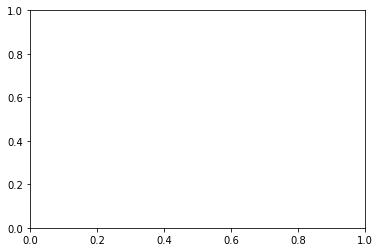

In [83]:
#plt.figure() #기본사이즈 생략 가능 -내부적으로 plt.figure(figsize )생성
plt.axes()

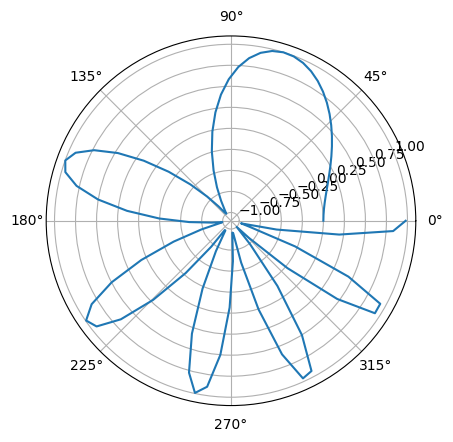

In [203]:
plt.axes(polar=True) #모양 변경
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x ** 2)
plt.plot(x,y)

4-tuple: [left, bottom, width, height]에 따른 0~1사이의 값으로 비율 조정.
    - 한셀에 겹치거나 같이 그리기 가능
    - state machine 때문 ( 추후에 알아볼 예정)
    - 왼쪽하단부터 시계방향으로 생성됨

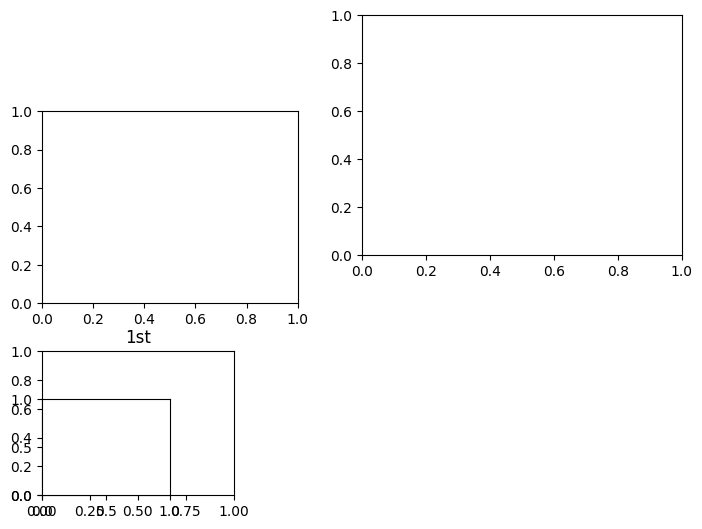

In [153]:
#plt.figure() #기본사이즈 생략 가능 -1개만 나옴
plt.axes([0,0,0.3,0.3])     # 왼쪽 하단
plt.axes([0,0,0.2,0.2])     #왼쪽하단 가장 작은 axes
plt.axes([0,0.4,0.4,0.4])   # 왼쪽 상단
plt.axes([0.5,0.5,0.5,0.5]) #오른쪽 상단

### plt.plot
- x축과 y축에 주어진 값에 따라서 선,점 그래프 그림
- `plt.plot([ 값 ])`
    - 기본: 파랑색의 line graph

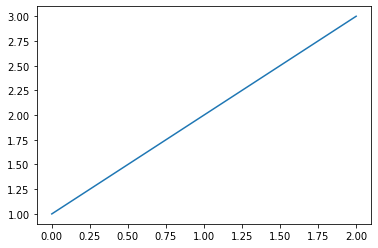

In [66]:
plt.plot([1,2,3])

fmt : 색상,마커, 라인 스타일 에대한 기본적 포맷팅을 정의하는데 편리하게 사용가능 
- 색상: `b`(파랑색),`r`(붉은색),`g`(초록색)
- 마커:`o`,`*`
- 선 : `-`(직선),`--`(점선),`-.`(점선2)
    - 순서 상관 없음
- 키워드랑 충돌잇는경우 키워드가 우선
공식문서 참고 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

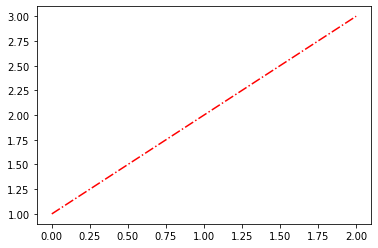

In [80]:
plt.plot([1,2,3],'-.r') #단축식으로 표현 가능

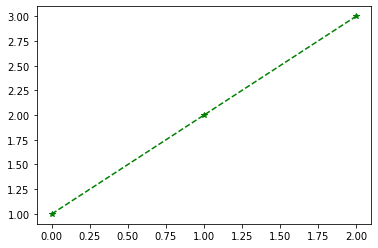

In [77]:
plt.plot([1,2,3],'g*--')

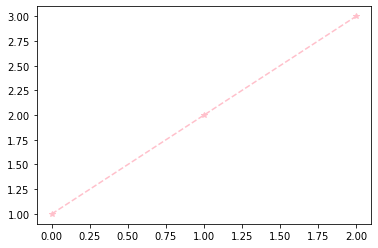

In [81]:
plt.plot([1,2,3],'g*--',color='pink') #키워드 우선

-  State Machine
    - 변수를 지정하지 않고 **가장 가까이 있는 객체에 같은 값을 공유하여 상태를 같이 사용**


Text(0.5, 1.0, 'test')

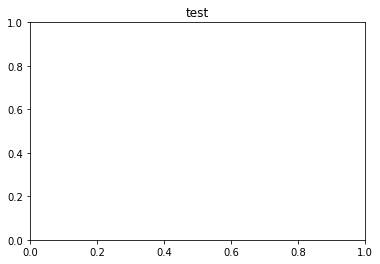

In [109]:
plt.title('test') #Statemachine때문에 아무것도 적용 불가.

위의 figure, axes, plot을 한번에 적용하기 

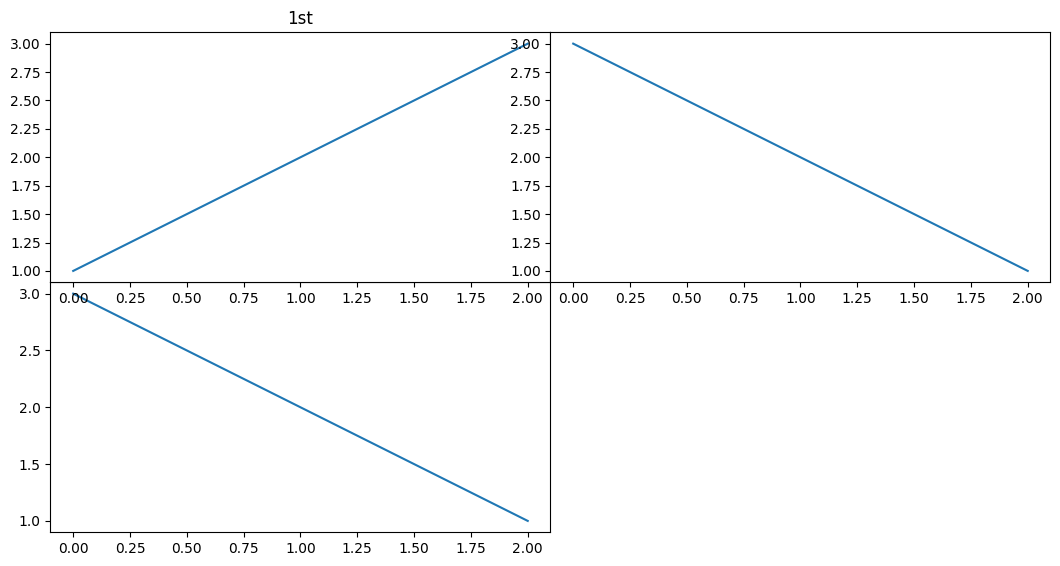

In [155]:
plt.figure(figsize=(10,5)) #기본사이즈 생략 가능

plt.axes([0,0,0.5,0.5]) 
plt.plot([3,2,1])
plt.axes([0,0.5,0.5,0.5]) 
plt.plot([1,2,3])
plt.title('1st')
plt.axes([0.5,0.5,0.5,0.5]) 
plt.plot([3,2,1])

### plt.subplots
- 여러개의 그래프를 하나의 figure에 그림
- 객체지향 방식으로 순서 상관 없이 사용
    - state machine 방식과 혼용 가능

아래에서는 일반적 state machine 방식으로는 뒤의 그래프만 접근가능

Text(0.5, 1.0, '1st')

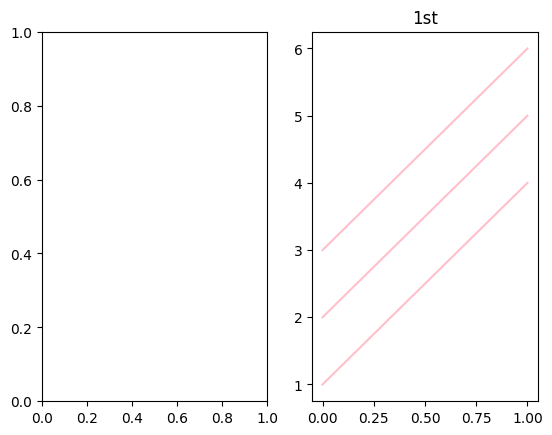

In [162]:
fig,ax=plt.subplots(1,2) #1행 2열

plt.plot([[1,2,3],[4,5,6]],color='pink') #단축식 사용
plt.title('2nd')       #state machine과 혼용

객체지향방식을 통해서 원하는 그래프를 조정 가능

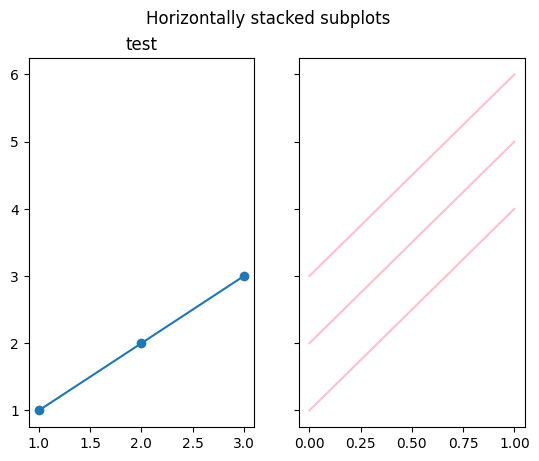

In [198]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True) #1행 2열
fig.suptitle('Horizontally stacked subplots')

ax1.plot([1,2,3],[1,2,3],'-o')
ax1.set_title('test')

plt.plot([[1,2,3],[4,5,6]],color='pink'); #단축식 사용


In [161]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

### plt.title
- 그림의 타이틀 추가
### plt.xlabel
### plt.ylabel
- 그림에  x축,y축에 라벨 추가

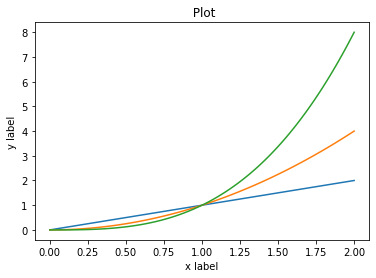

In [112]:
import  numpy as np
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title(" Plot")

plt.show()

### plt.legend
- 범례 추가

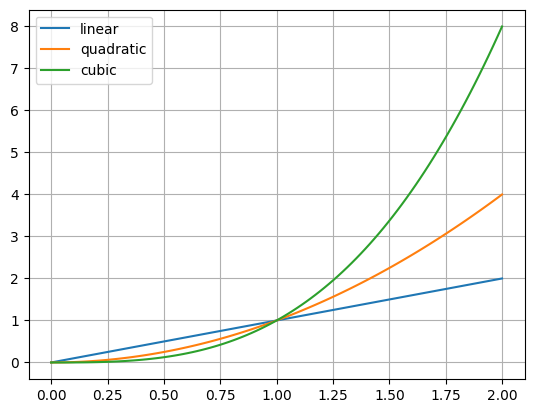

In [210]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.legend()
plt.grid(True) #격자무늬 생성

legend와 plot의 라벨이 충돌하는 경우 legend 우선순위

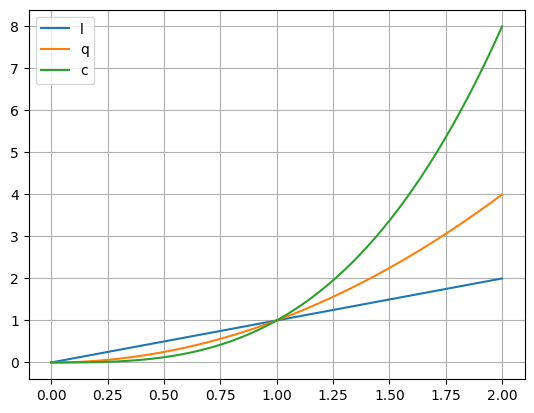

In [209]:
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.legend(labels=('l','q','c'))
plt.grid(True) #격자무늬 생성

### plt.grid
- grid(plt.grid(b=None,which='Major',axis='both') 
- 그래프 내 격자 선 추가
    - tick 기반으로 격자 생성함을 알수 있음
    
### plt.xticks
### plt.yticks
- x,y축의 tick(표시 눈금)를 list형태로 지정
- label로 틱 위치에 틱의 라벨 지정


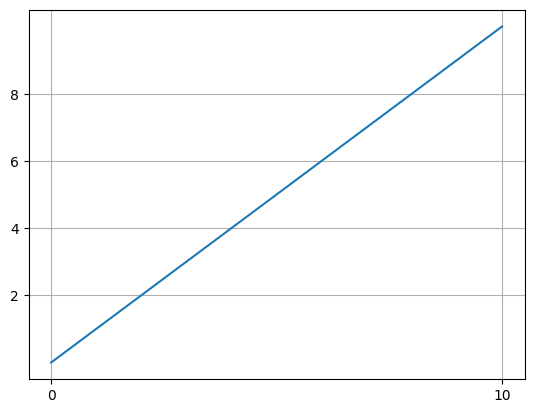

In [205]:
x = np.linspace(0, 10, 10)
plt.plot(x, x, label='linear')
plt.grid(True) #격자무늬 생성

plt.xticks([0,10]) 
plt.yticks([2,4,6,8]) 

plt.show()

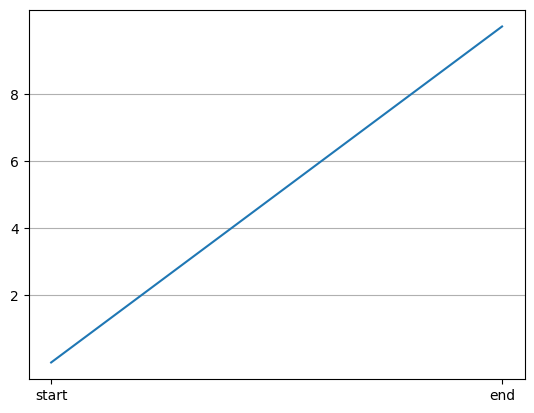

In [186]:
plt.plot(x, x, label='linear')

plt.grid(b=True,which='both',axis='y') 
plt.xticks([0,10],['start', 'end']) 
plt.yticks([2,4,6,8]) ;

### plt.xlim
### plt.ylim
 현재의 axes의 x축이나 y축의 시작, 끝부분은 제한하여 그래프를 강조 하기도 가능

<AxesSubplot:title={'center':'State Machine'}, xlabel='sex'>

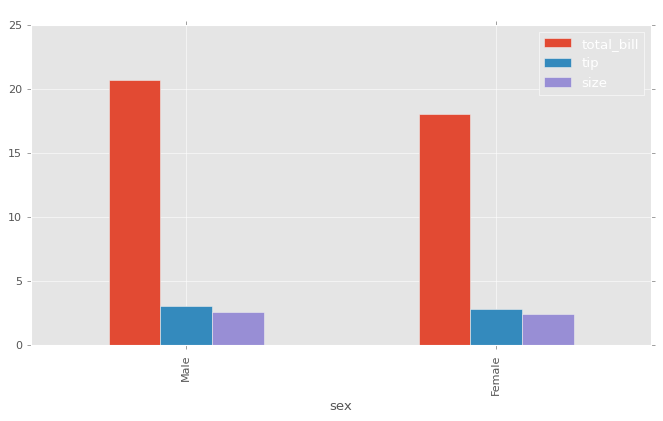

In [141]:
tips.groupby('sex').mean().plot.bar(figsize=(10,5),
                                    title='State Machine')


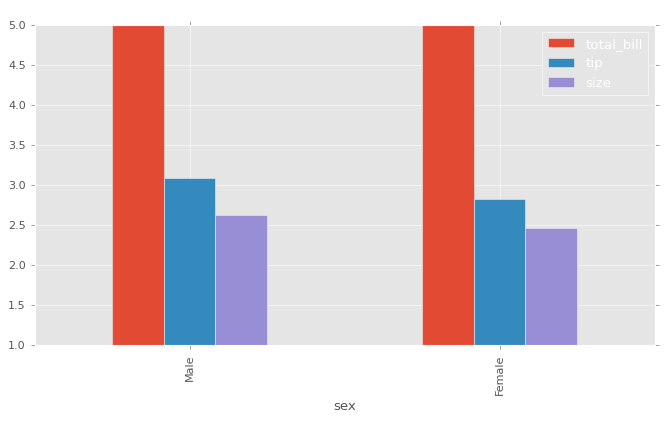

In [146]:
tips.groupby('sex').mean().plot.bar(figsize=(10,5),
                                    title='State Machine',ylim=[1,5]);


### plt.style
- 그래프 스타일
    - `plt.style.available` : 사용 가능한 그래프 스타일 보여줌

In [114]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

### plt.style.use
- 전체에 적용
- global state : 한 번 지정하면 변경전까지 그 스타일 유지

<AxesSubplot:>

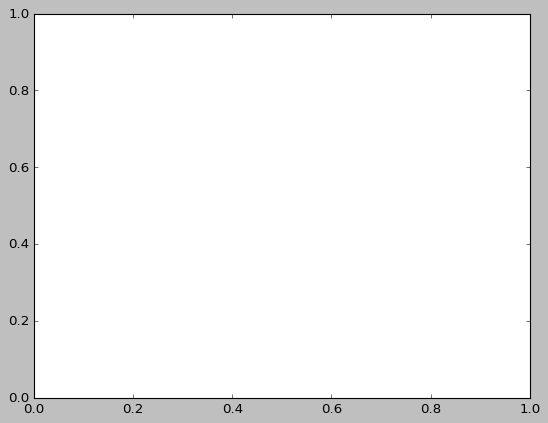

In [116]:
plt.style.use('classic')
plt.axes()

In [117]:
plt.style.use('ggplot') # ggplot은 R의 ggplot 패키지를 흉내냄

<AxesSubplot:>

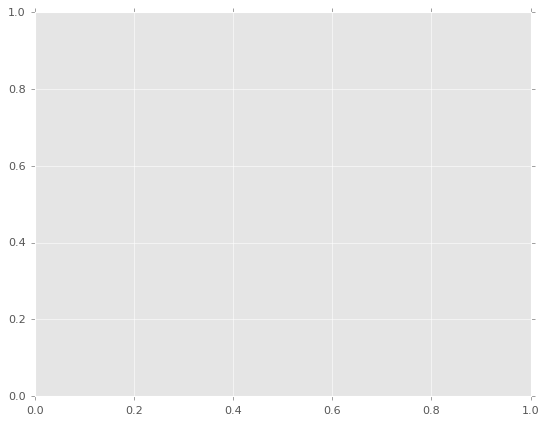

In [118]:
plt.axes()

따로 적용하지 않아도 ggplot 스타일이 적용됨

(1.0, 2.0)

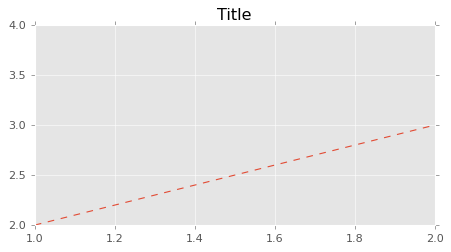

In [120]:
plt.figure(figsize=(10,5)) #기본사이즈 생략 가능
plt.axes([0,0,0.5,0.5]) 
plt.plot([4,2,3],'--')
plt.title('Title')
plt.grid(True) #격자무늬 생성

plt.xlim([1,2])

이전의 그래프 스타일로 돌아가고싶으면 `plt.style.use('default')`

<AxesSubplot:>

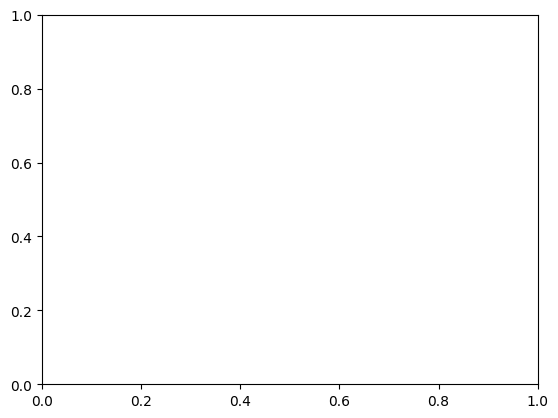

In [211]:
plt.style.use('default')
plt.axes()

### plt.style.context
- 해당 셀에서만 다른 스타일 적용하도록 지정

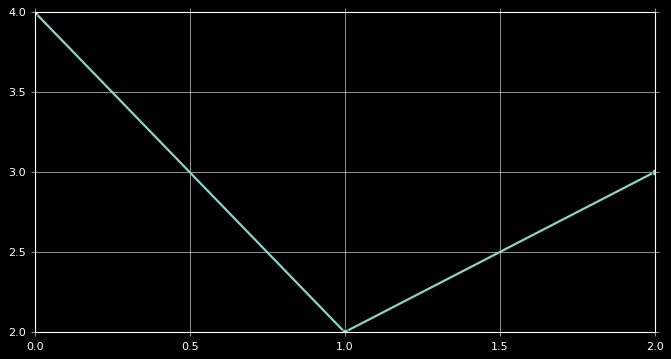

In [149]:
plt.rcParams['lines.linewidth'] = 2 #조절
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,5))
    plt.plot([4,2,3],'-o')

In [127]:
import seaborn as sns

In [128]:
tips=sns.load_dataset('tips')

graph customizing 가능